# Data Preparation

In [1]:
#Necessary imports for data prep and analysis
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import numpy as np
from scipy.stats import gaussian_kde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 43.1 MB/s eta 0:00:00


In [ ]:
tornado_df = pd.read_csv('/content/drive/Shareddrives/MATH 3439 Work/project3-team4/data/1950-2021_all_tornadoes.csv')

In [ ]:
tornado_df.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag',
       'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
       'wid', 'ns', 'sn', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc'],
      dtype='object')

In [ ]:
#Renaming and dropping some columns we initially believe to be irrevelvant
tornado_model_data = tornado_df.rename(columns={'om':'tornado_count', 'yr':'year', 'mo': 'month',
                                   'dy': 'day', 'date': 'date', 'time': 'time',
                                   'tz': 'time_zone', 'st': 'state', 'stf': 'state_FIPS',
                                   'mag': 'EF-Scale', 'inj': 'injuries', 'fat': 'fatalities',
                                   'loss': 'est_prop_loss', 'closs': 'est_crop_loss',
                                   'slat': 'start_lat', 'slon': 'start_long', 'elat': 'end_lat',
                                   'elon': 'end_long', 'len': 'length(mi)', 'wid' : 'width (yd)',
                                   'ns' :'total_state_affected', 'f1': 'county_fips_1',
                                    'f2': 'county_fips_2', 'f3': 'county_fips_3', 'f4' : 'county_fips_4',
                                    'sn' :'state_num', 'sg': 'tornado_segment', 'fc': 'estimated_F-scale (2016)'})

In [ ]:
#Saving condensed version of dataset to the same folder for use by all teammates
tornado_model_data.to_csv('/content/drive/Shareddrives/MATH 3439 Work/project3-team4/data/model_data.csv')

In [2]:
model_df = pd.read_csv('/content/drive/Shareddrives/MATH 3439 Work/project3-team4/data/model_data.csv')

# Common Characteristics of Tornadoes

In [ ]:
print(f"Average Tornado Length: {model_df['length(mi)'].mean():.2f} miles")
print(f"Average Tornado Width: {model_df['width (yd)'].mean():.2f} yards")

Average Tornado Length: 5.56 miles
Average Tornado Width: 150.65 yards


In [ ]:
print(f"Average Tornado Length and Width for EF0 Tornadoes: {model_df[model_df['EF-Scale'] == 0][['length(mi)', 'width (yd)']].mean()}")
print(f"Average Tornado Length and Width for EF1 Tornadoes: {model_df[model_df['EF-Scale'] == 1][['length(mi)', 'width (yd)']].mean()}")
print(f"Average Tornado Length and Width for EF2 Tornadoes: {model_df[model_df['EF-Scale'] == 2][['length(mi)', 'width (yd)']].mean()}")
print(f"Average Tornado Length and Width for EF3 Tornadoes: {model_df[model_df['EF-Scale'] == 3][['length(mi)', 'width (yd)']].mean()}")
print(f"Average Tornado Length and Width for EF4 Tornadoes: {model_df[model_df['EF-Scale'] == 4][['length(mi)', 'width (yd)']].mean()}")
print(f"Average Tornado Length and Width for EF5 Tornadoes: {model_df[model_df['EF-Scale'] == 5][['length(mi)', 'width (yd)']].mean()}")

Average Tornado Length and Width for EF0 Tornadoes: length(mi)     1.590970
width (yd)    57.856417
dtype: float64
Average Tornado Length and Width for EF1 Tornadoes: length(mi)      5.429994
width (yd)    159.576315
dtype: float64
Average Tornado Length and Width for EF2 Tornadoes: length(mi)     10.939317
width (yd)    257.795866
dtype: float64
Average Tornado Length and Width for EF3 Tornadoes: length(mi)     17.934711
width (yd)    441.454040
dtype: float64
Average Tornado Length and Width for EF4 Tornadoes: length(mi)     29.170312
width (yd)    641.473294
dtype: float64
Average Tornado Length and Width for EF5 Tornadoes: length(mi)     38.635556
width (yd)    819.061728
dtype: float64


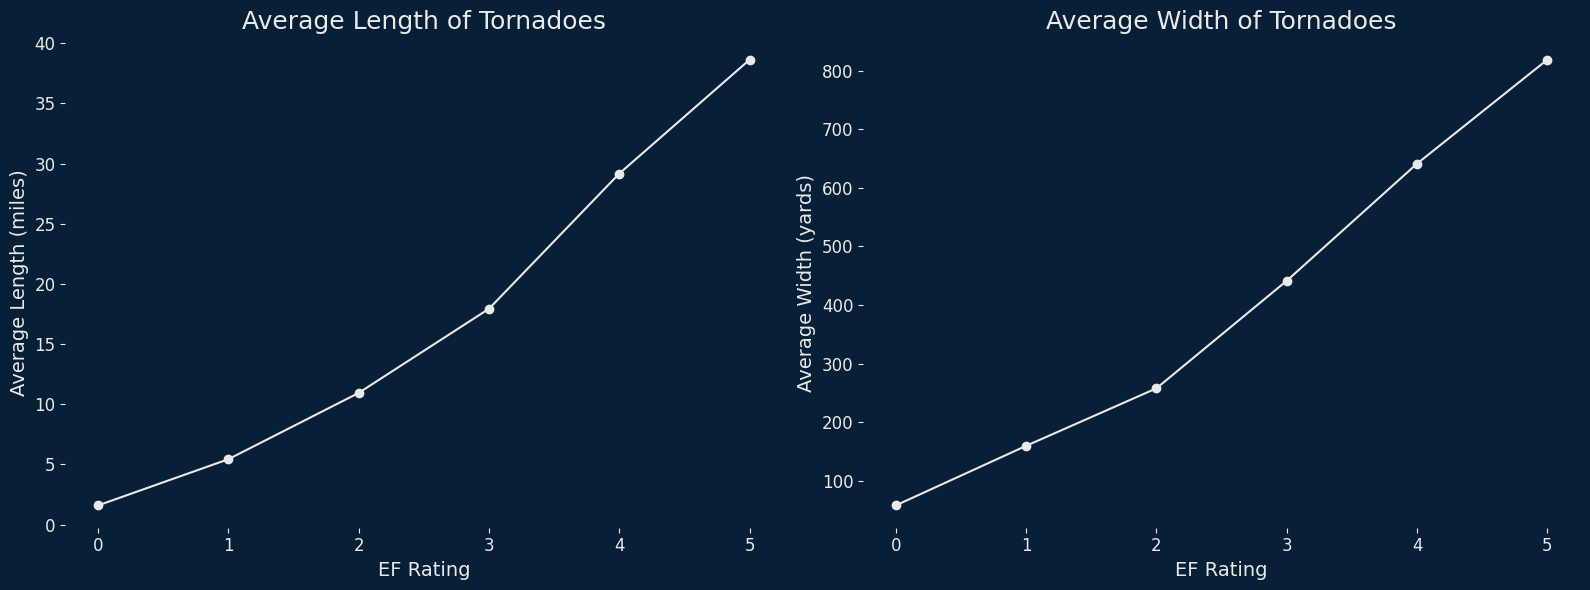

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter out invalid EF ratings (e.g., -9)
model_df_filtered = model_df[model_df['EF-Scale'] != -9]

# Group by EF-Scale and calculate average length and width
ef_stats = model_df_filtered.groupby('EF-Scale')[['length(mi)', 'width (yd)']].mean().reset_index()

# Sort by EF-Scale for proper plotting order
ef_stats = ef_stats.sort_values('EF-Scale')

# Create two subplots (one for length, one for width)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), facecolor='#072037')

# Plot 1: Average Length by EF Rating
ax1.set_facecolor('#072037')
ax1.plot(ef_stats['EF-Scale'].astype(str), ef_stats['length(mi)'], marker='o', color='#e9e9e9', label='Avg Length (mi)')
ax1.set_xlabel('EF Rating', color='#e9e9e9', fontsize=14)
ax1.set_ylabel('Average Length (miles)', color='#e9e9e9', fontsize=14)
ax1.set_title('Average Length of Tornadoes', color='#e9e9e9', fontsize=18)
ax1.tick_params(axis='x', colors='#e9e9e9', labelsize=12)
ax1.tick_params(axis='y', colors='#e9e9e9', labelsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.grid(False)

# Plot 2: Average Width by EF Rating
ax2.set_facecolor('#072037')
ax2.plot(ef_stats['EF-Scale'].astype(str), ef_stats['width (yd)'], marker='o', color='#e9e9e9', label='Avg Width (yd)')
ax2.set_xlabel('EF Rating', color='#e9e9e9', fontsize=14)
ax2.set_ylabel('Average Width (yards)', color='#e9e9e9', fontsize=14)
ax2.set_title('Average Width of Tornadoes', color='#e9e9e9', fontsize=18)
ax2.tick_params(axis='x', colors='#e9e9e9', labelsize=12)
ax2.tick_params(axis='y', colors='#e9e9e9', labelsize=12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.grid(False)

plt.tight_layout()
plt.show()

In [ ]:
#Number of tornadoes in each decade included in dataset
model_df['decade'] = (model_df['year'] // 10) * 10
decade_counts = model_df.groupby('decade').size()
print(decade_counts)


#Number of tornadoes in each year included in dataset:
year_counts = model_df.groupby('year').size()
print(year_counts)

decade
1950     1745
1960     1922
1970     2430
1980     2172
1990     6682
2000    12661
2010    12253
2020     2469
dtype: int64
year
1950      95
1951      80
1952     104
1953     187
1954     213
        ... 
2017    1471
2018    1144
2019    1562
2020    1110
2021    1359
Length: 72, dtype: int64


# Data Visualization

## Tornado Distribution Across Decades and States

The following section includes 2-3 versions of graphs visualizing our data. One version keeps all of the ratings and the second excludes EF0 and EF5 tornadoes. This approach was done becuase at the time of creating these graphs, the team wasn't sure if we wanted to include EF0 and EF5 magnitudes in the data overview section of the presentation. However, we ultimately decided to keep all of the ratings.

There are additionally visualizations detailing state level data and a combination of state and tornado count data. These graphs were helpful for getting an high-level understanding of the data but were not included in the final presentation.

###**Distribution of Tornadoes Across Decades (All Ratings)**

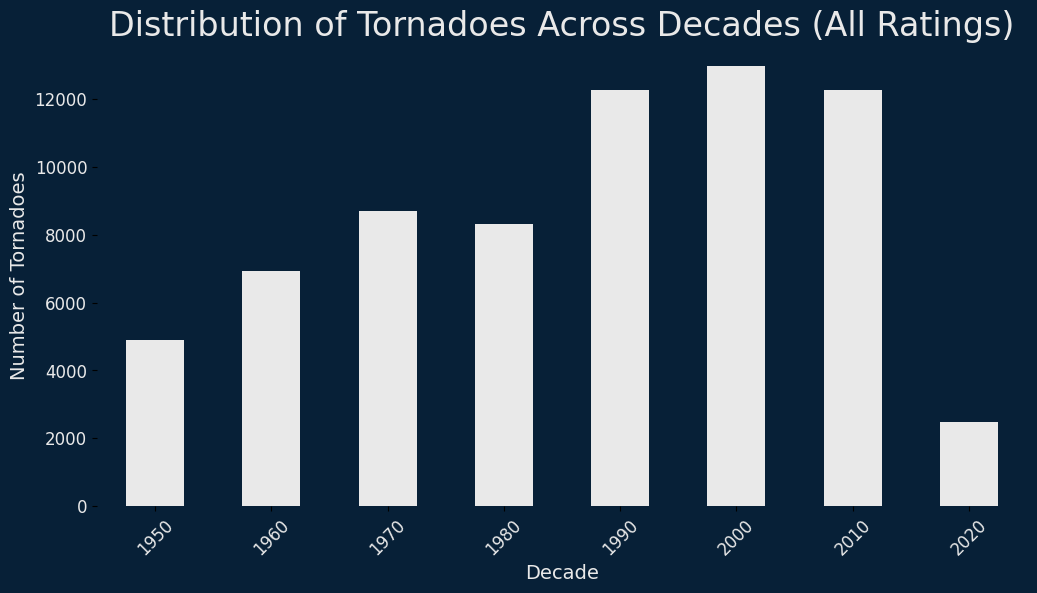

In [ ]:
# Create a decade column by flooring the year to the nearest decade
model_df['decade'] = (model_df['year'] // 10) * 10

# Group by decade and count total tornadoes
decade_counts = model_df.groupby('decade').size()

# Plot a bar chart
plt.figure(figsize=(12, 6), facecolor='#072037')
ax = plt.gca()
ax.set_facecolor('#072037')

decade_counts.plot(kind='bar', color='#e9e9e9', ax=ax)

plt.title('Distribution of Tornadoes Across Decades (All Ratings)', color='#e9e9e9', fontsize=24)
plt.xlabel('Decade', color='#e9e9e9', fontsize=14)
plt.ylabel('Number of Tornadoes', color='#e9e9e9', fontsize=14)
plt.xticks(rotation=45, color='#e9e9e9', fontsize=12)
plt.yticks(color='#e9e9e9', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(False)
plt.show()

### **Tornado Distribution Across Decades (Excluding EF0 & EF5)**

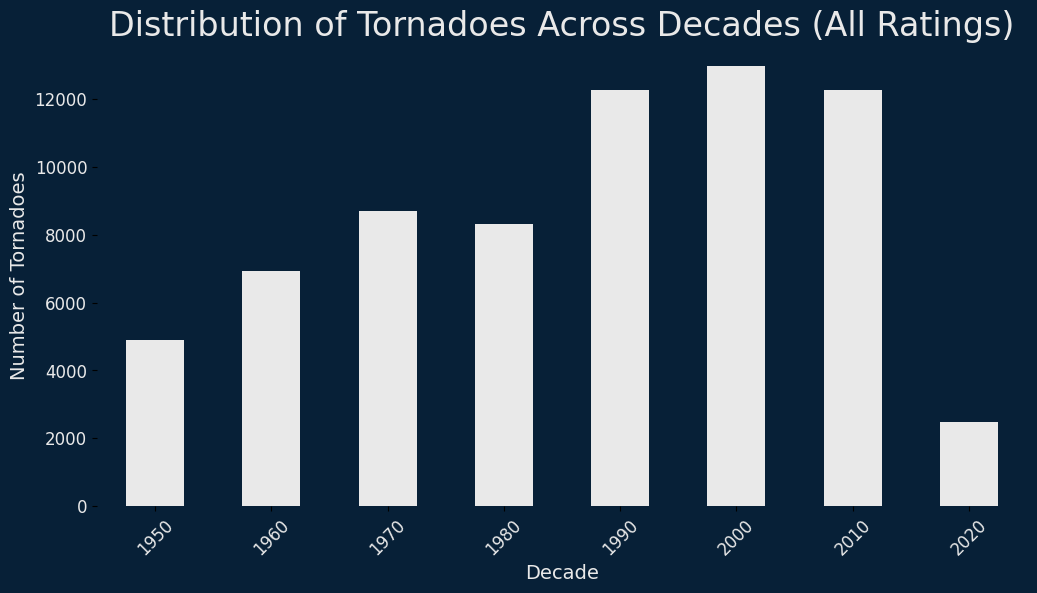

In [ ]:
# Create a decade column by flooring the year to the nearest decade
model_df['decade'] = (model_df['year'] // 10) * 10

# Group by decade and count total tornadoes
decade_counts = model_df.groupby('decade').size()

# Plot a bar chart
plt.figure(figsize=(12, 6), facecolor='#072037')
ax = plt.gca()
ax.set_facecolor('#072037')

decade_counts.plot(kind='bar', color='#e9e9e9', ax=ax)

plt.title('Distribution of Tornadoes Across Decades (All Ratings)', color='#e9e9e9', fontsize=24)
plt.xlabel('Decade', color='#e9e9e9', fontsize=14)
plt.ylabel('Number of Tornadoes', color='#e9e9e9', fontsize=14)
plt.xticks(rotation=45, color='#e9e9e9', fontsize=12)
plt.yticks(color='#e9e9e9', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(False)
plt.show()

<ipython-input-10-51decdc4276e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['decade'] = (filtered_df['year'] // 10) * 10


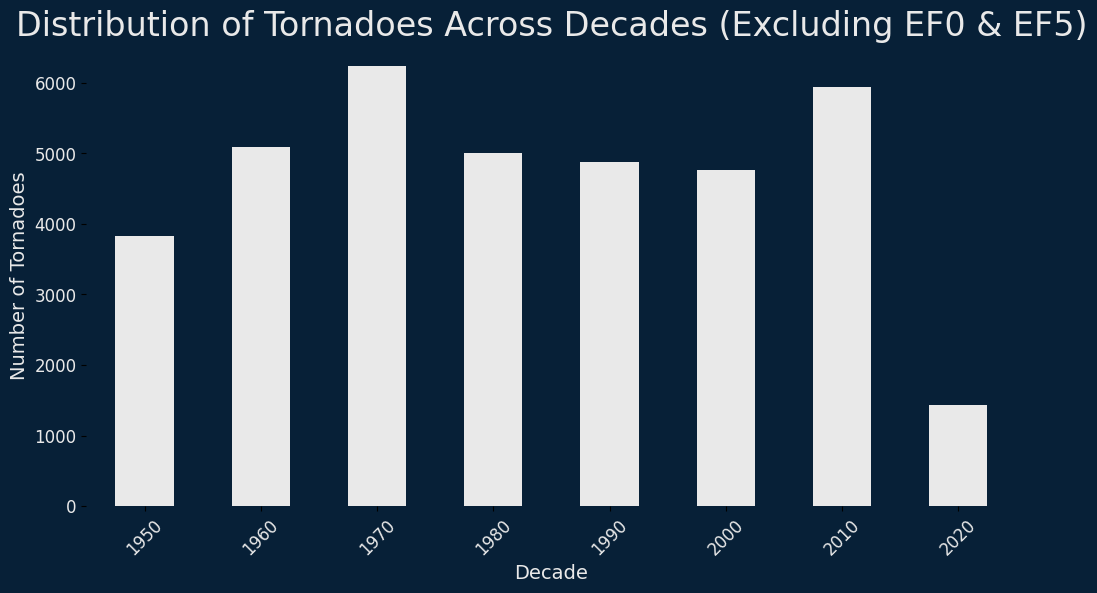

In [ ]:
# Filter out EF0 and EF5 ratings
filtered_df = model_df[~model_df['EF-Scale'].isin([0, 5])]

# Create a decade column by flooring the year to the nearest decade
filtered_df['decade'] = (filtered_df['year'] // 10) * 10

# Group by decade and count total tornadoes
decade_counts = filtered_df.groupby('decade').size()

# Plot a bar chart
plt.figure(figsize=(12, 6), facecolor='#072037')
ax = plt.gca()
ax.set_facecolor('#072037')

decade_counts.plot(kind='bar', color='#e9e9e9', ax=ax)

plt.title('Distribution of Tornadoes Across Decades (Excluding EF0 & EF5)', color='#e9e9e9', fontsize=24)
plt.xlabel('Decade', color='#e9e9e9', fontsize=14)
plt.ylabel('Number of Tornadoes', color='#e9e9e9', fontsize=14)
plt.xticks(rotation=45, color='#e9e9e9', fontsize=12)
plt.yticks(color='#e9e9e9', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(False)
plt.show()

### **Distribution of Tornadoes Across State (All Ratings)**

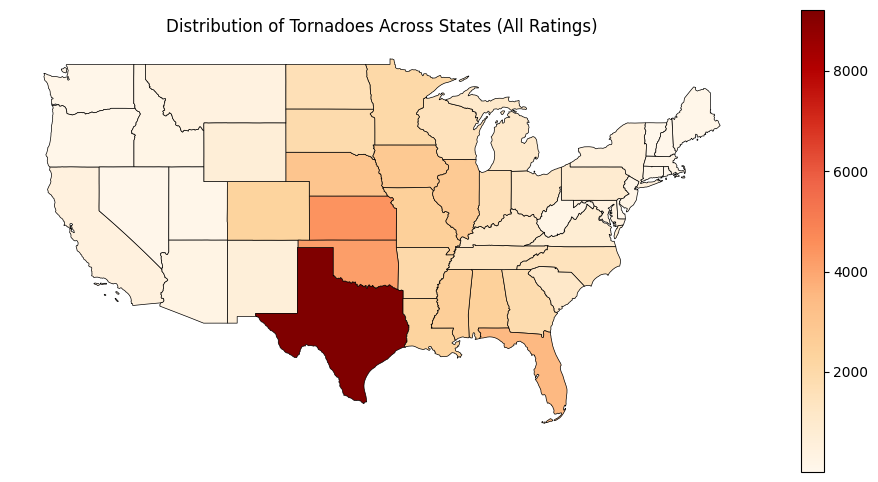

In [ ]:
shapefile_path = '/content/drive/Shareddrives/MATH 3439 Work/project3-team4/data/Shapefiles/cb_2018_us_state_20m.shp'

states = gpd.read_file(shapefile_path)
states = states[(states['STUSPS'] != 'AK') & (states['STUSPS'] != 'HI') & (states['STUSPS'] != 'PR')]  # Exclude AK, HI, PR

# Group by state and count tornadoes
state_counts = model_df.groupby('state').size().reset_index(name='tornado_count')

# Merge the tornado counts with the states GeoDataFrame
states = states.merge(state_counts, left_on='STUSPS', right_on='state', how='left').fillna(0)

# Create a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
states.plot(column='tornado_count', ax=ax, legend=True, cmap='OrRd',
            edgecolor='black', linewidth=0.5, missing_kwds={'color': 'lightgrey'})
ax.set_title('Distribution of Tornadoes Across States (All Ratings)')
ax.set_axis_off()
plt.show()

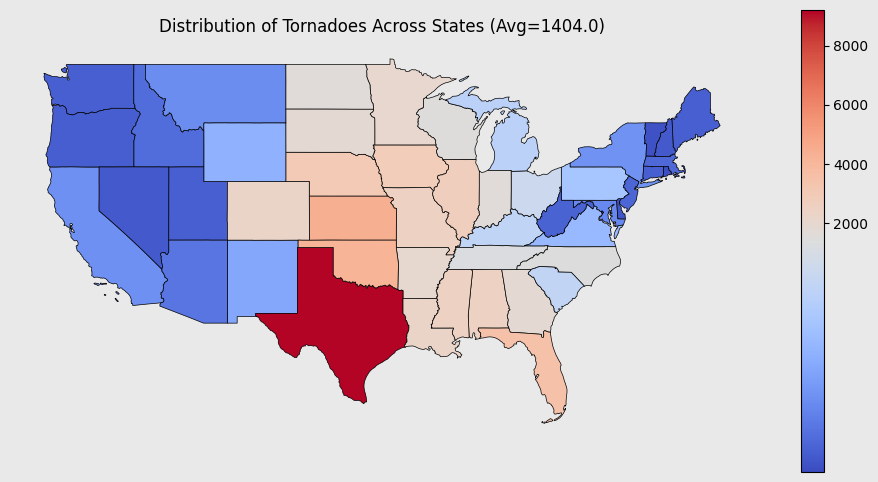

In [ ]:
from matplotlib.colors import TwoSlopeNorm

# Group by state and count tornadoes
state_counts = model_df.groupby('state').size().reset_index(name='tornado_count')

# Calculate the average tornado count for the diverging colormap
average_count = states[states['tornado_count'] > 0]['tornado_count'].mean()

# Create a diverging colormap with the midpoint at the average
norm = TwoSlopeNorm(vmin=states['tornado_count'].min(), vcenter=average_count, vmax=states['tornado_count'].max())

# Create a choropleth map with a diverging colormap
fig, ax = plt.subplots(1, 1, figsize=(12, 6), facecolor='#e9e9e9')
states.plot(column='tornado_count', ax=ax, legend=True, cmap='coolwarm', norm=norm,
            edgecolor='black', linewidth=0.5, missing_kwds={'color': 'lightgrey'})
ax.set_title(f'Distribution of Tornadoes Across States (Avg={average_count:.1f})')
ax.set_axis_off()
plt.show()

<ipython-input-13-b5d20aab20b8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df_filtered['decade'] = (model_df_filtered['year'] // 10) * 10


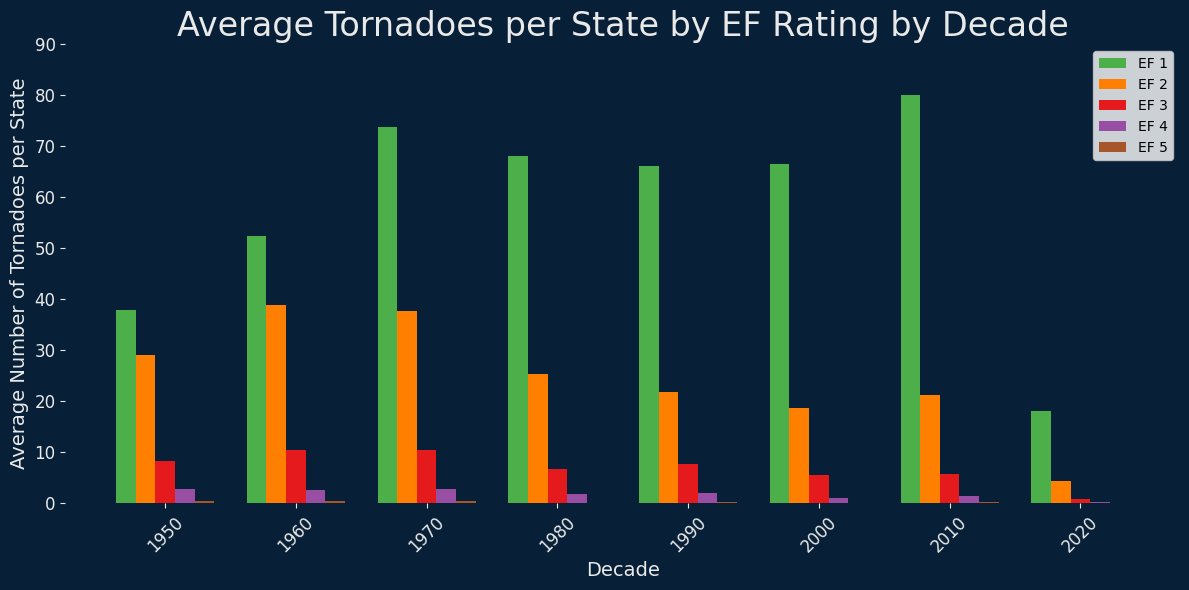

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out EF -9 and add decade column
model_df_filtered = model_df[model_df['EF-Scale'] != -9]
model_df_filtered['decade'] = (model_df_filtered['year'] // 10) * 10

# Group by decade and EF rating, count tornadoes per state, then calculate average
ef_decade_counts = model_df_filtered.groupby(['decade', 'state', 'EF-Scale']).size().reset_index(name='tornado_count')
ef_decade_pivot = ef_decade_counts.pivot_table(index=['decade', 'state'], columns='EF-Scale', values='tornado_count').fillna(0)
ef_decade_averages = ef_decade_pivot.groupby('decade').mean().reset_index()

# Define custom color mapping for EF ratings 1–5
color_mapping = {
    1: '#4daf4a',  # Green
    2: '#ff7f00',  # Yellow
    3: '#e41a1c',  # Orange
    4: '#984ea3',  # Purple
    5: '#a65628'   # Dark Red
}

# Prepare data for plotting (focus on EF 1–5)
ef_ratings = [1, 2, 3, 4, 5]
data_to_plot = ef_decade_averages[['decade'] + ef_ratings].values
decades = ef_decade_averages['decade'].unique()

# Create a bar plot
plt.figure(figsize=(12, 6), facecolor='#072037')
ax = plt.gca()
ax.set_facecolor('#072037')

bar_width = 0.15
index = range(len(decades))

for i, ef in enumerate(ef_ratings):
    ax.bar([d + i * bar_width for d in index],
           ef_decade_averages[ef].values,
           bar_width,
           label=f'EF {ef}',
           color=color_mapping.get(ef, 'gray'))

ax.set_xlabel('Decade', color='#e9e9e9', fontsize=14)
ax.set_ylabel('Average Number of Tornadoes per State', color='#e9e9e9', fontsize=14)
ax.set_title('Average Tornadoes per State by EF Rating by Decade', color='#e9e9e9', fontsize=24)
ax.set_xticks([d + bar_width * 2 for d in index])
ax.set_xticklabels(decades, rotation=45)  # Set labels first
ax.tick_params(axis='x', colors='#e9e9e9', labelsize=12)  # Apply color and size
ax.set_yticks(ax.get_yticks())  # Set ticks first
ax.tick_params(axis='y', colors='#e9e9e9', labelsize=12)  # Apply color and size

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(False)
ax.legend()

plt.tight_layout()
plt.show()

### **Distribution of Tornadoes Across States (Excluding EF0 & EF5)**

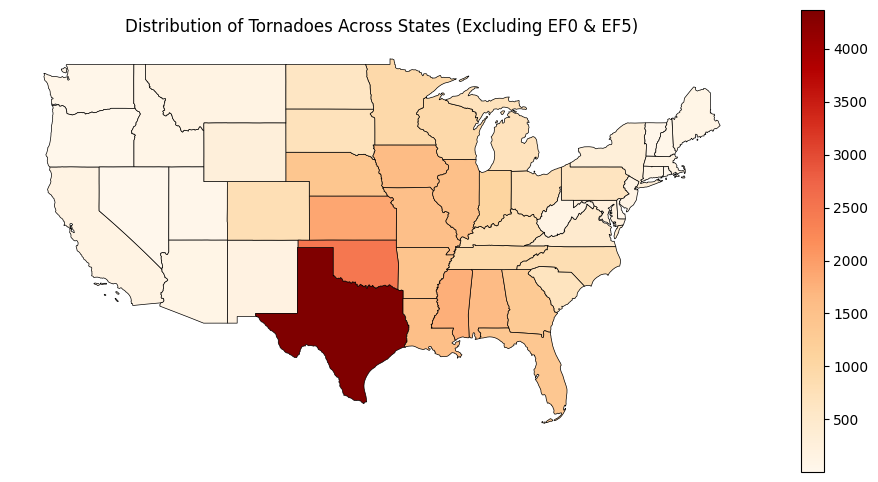

In [ ]:
shapefile_path = '/content/drive/Shareddrives/MATH 3439 Work/project3-team4/data/Shapefiles/cb_2018_us_state_20m.shp'

states = gpd.read_file(shapefile_path)
states = states[(states['STUSPS'] != 'AK') & (states['STUSPS'] != 'HI') & (states['STUSPS'] != 'PR')]  # Exclude AK, HI, PR

# Filter out EF0 and EF5 ratings
filtered_df = model_df[~model_df['EF-Scale'].isin([0, 5])]

# Group by state and count tornadoes
state_counts = filtered_df.groupby('state').size().reset_index(name='tornado_count')

# Merge the tornado counts with the states GeoDataFrame
states = states.merge(state_counts, left_on='STUSPS', right_on='state', how='left').fillna(0)

# Create a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
states.plot(column='tornado_count', ax=ax, legend=True, cmap='OrRd',
            edgecolor='black', linewidth=0.5, missing_kwds={'color': 'lightgrey'})
ax.set_title('Distribution of Tornadoes Across States (Excluding EF0 & EF5)')
ax.set_axis_off()
plt.show()

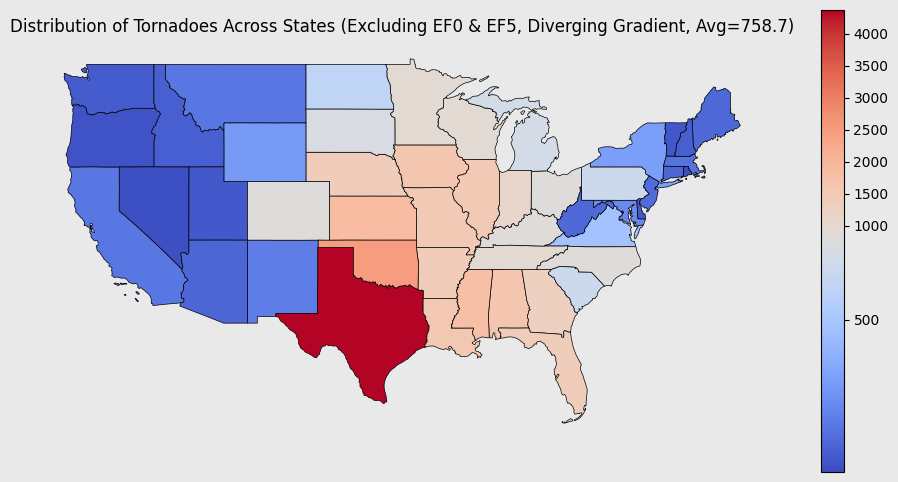

In [ ]:
# Group by state and count tornadoes
state_counts = filtered_df.groupby('state').size().reset_index(name='tornado_count')

# Calculate the average tornado count for the diverging colormap
average_count = states['tornado_count'].mean()

# Create a diverging colormap with the midpoint at the average
norm = TwoSlopeNorm(vmin=states['tornado_count'].min(), vcenter=average_count, vmax=states['tornado_count'].max())

# Create a choropleth map with a diverging colormap
fig, ax = plt.subplots(1, 1, figsize=(12, 6), facecolor='#e9e9e9')
states.plot(column='tornado_count', ax=ax, legend=True, cmap='coolwarm', norm=norm,
            edgecolor='black', linewidth=0.5, missing_kwds={'color': 'lightgrey'})
ax.set_title(f'Distribution of Tornadoes Across States (Excluding EF0 & EF5, Diverging Gradient, Avg={average_count:.1f})')
ax.set_axis_off()
plt.show()

### **Tornado Density Map**

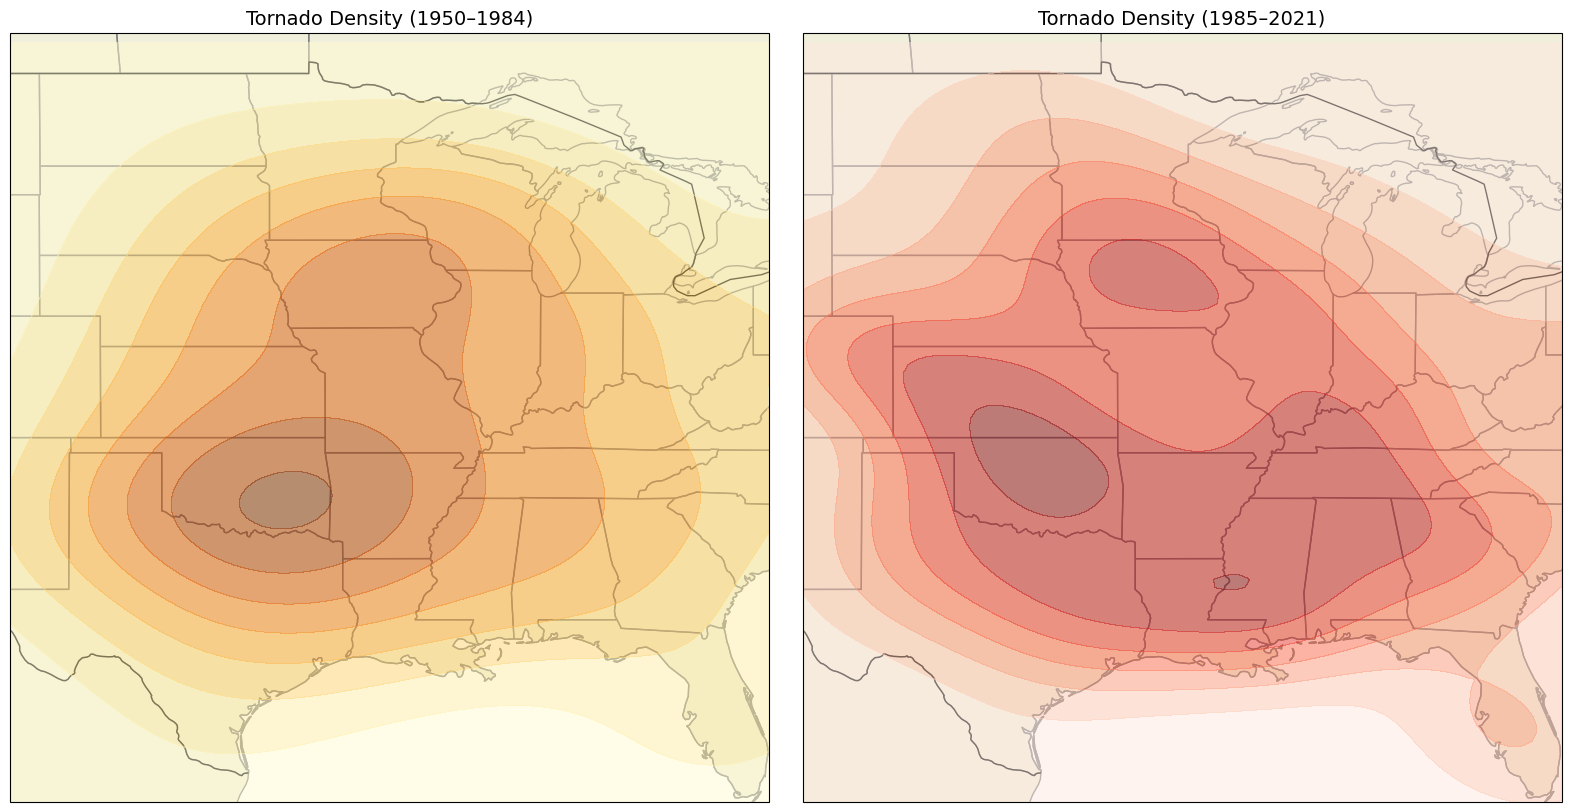

In [8]:
# Split the data into two periods
period_1 = model_df[(model_df['year'] >= 1950) & (model_df['year'] <= 1984)]
period_2 = model_df[(model_df['year'] >= 1985) & (model_df['year'] <= 2021)]

# Set up the plot with cartopy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent for both subplots (Central U.S.)
for ax in [ax1, ax2]:
    ax.set_extent([-105, -80, 25, 50])
    ax.add_feature(cfeature.LAND, edgecolor='gray', zorder=0)
    ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='solid', zorder=1)
    ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1, zorder=1)

# Function to create a heatmap
def plot_heatmap(ax, data, color, label):
    # Extract coordinates
    x = data['start_long']
    y = data['start_lat']

    # Create a grid for the heatmap
    x_grid, y_grid = np.mgrid[-105:-80:100j, 25:50:100j]
    positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
    values = np.vstack([x, y])

    # Perform kernel density estimation
    kernel = gaussian_kde(values)
    z = np.reshape(kernel(positions).T, x_grid.shape)

    # Plot the heatmap
    ax.contourf(x_grid, y_grid, z, cmap=color, alpha=0.5, transform=ccrs.PlateCarree())
    ax.set_title(label, fontsize=14)

# Plot heatmap for 1950–1984
plot_heatmap(ax1, sample_period_1, 'YlOrBr', 'Tornado Density (1950–1984)')

# Plot heatmap for 1985–2021
plot_heatmap(ax2, sample_period_2, 'Reds', 'Tornado Density (1985–2021)')

plt.tight_layout()
plt.show()

### **Combined Visualization (All Ratings)**

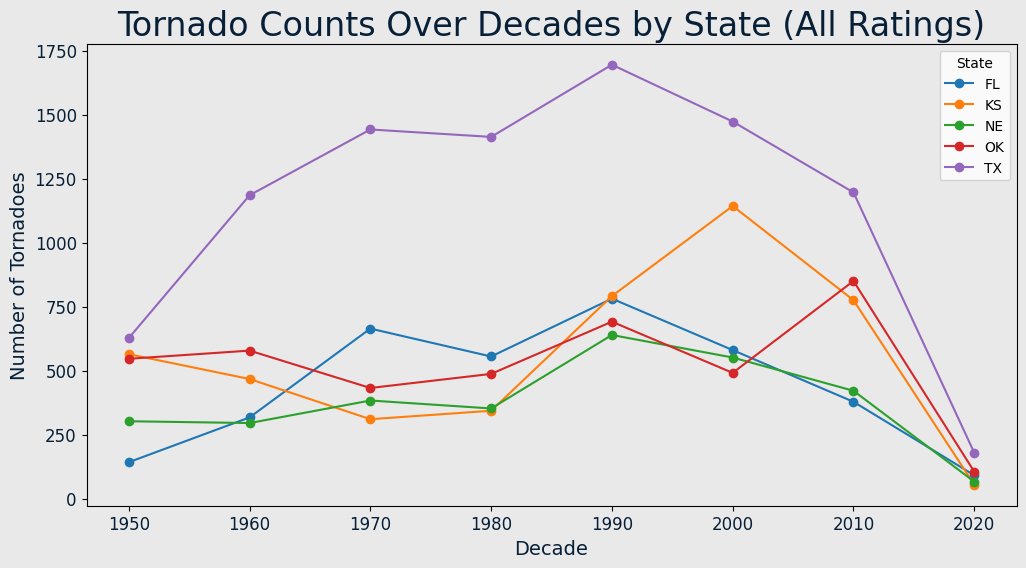

In [ ]:
# Group by decade and state, then count tornadoes
tornado_counts = model_df.groupby(['decade', 'state']).size().reset_index(name='tornado_count')

# Get the top 5 states by total tornado count
top_states = model_df['state'].value_counts().head(5).index
tornado_counts = tornado_counts[tornado_counts['state'].isin(top_states)]

# Pivot the data for plotting (decade as x-axis, tornado count as y-axis, one line per state)
pivot_data = tornado_counts.pivot(index='decade', columns='state', values='tornado_count').fillna(0)

# Create a multi-line plot
plt.figure(figsize=(12, 6), facecolor='#e9e9e9')
ax = plt.gca()
ax.set_facecolor('#e9e9e9')
for state in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[state], marker='o', label=state)
plt.title('Tornado Counts Over Decades by State (All Ratings)', color='#072037', fontsize=24)
plt.xlabel('Decade', color='#072037', fontsize=14)
plt.xticks(color='#072037', fontsize=12)
plt.ylabel('Number of Tornadoes', color='#072037', fontsize=14)
plt.yticks(color='#072037', fontsize=12)
plt.legend(title='State')
plt.grid(False)
plt.show()

### **Combined Visualization (Excluding Ef0 & EF5)**

<ipython-input-17-0b7fa24260d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['decade'] = (filtered_df['year'] // 10) * 10


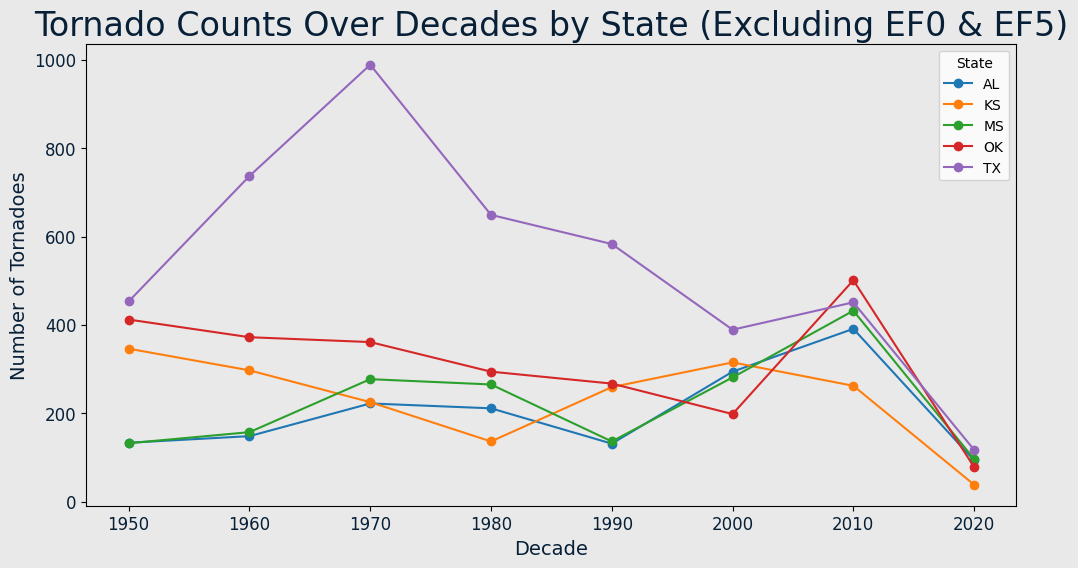

In [ ]:
filtered_df['decade'] = (filtered_df['year'] // 10) * 10

# Group by decade and state, then count tornadoes
tornado_counts = filtered_df.groupby(['decade', 'state']).size().reset_index(name='tornado_count')

# Get the top 5 states by total tornado count
top_states = filtered_df['state'].value_counts().head(5).index
tornado_counts = tornado_counts[tornado_counts['state'].isin(top_states)]

# Pivot the data for plotting (decade as x-axis, tornado count as y-axis, one line per state)
pivot_data = tornado_counts.pivot(index='decade', columns='state', values='tornado_count').fillna(0)

# Create a multi-line plot
plt.figure(figsize=(12, 6), facecolor='#e9e9e9')
ax = plt.gca()
ax.set_facecolor('#e9e9e9')
for state in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[state], marker='o', label=state)
plt.title('Tornado Counts Over Decades by State (Excluding EF0 & EF5)', color='#072037', fontsize=24)
plt.xlabel('Decade', color='#072037', fontsize=14)
plt.xticks(color='#072037', fontsize=12)
plt.ylabel('Number of Tornadoes', color='#072037', fontsize=14)
plt.yticks(color='#072037', fontsize=12)
plt.legend(title='State')
plt.grid(False)
plt.show()

## Vector Field of Tornado Paths

Similarly to our data visualization section, there are several iterations of the same vector fields dealing with excluding certain EF ratings and color-coding based on magnitude or decade.

Not every one of these was included in the final presentation but did help in understanding the data enough that we had a solid logic going into modeling.

In [ ]:
#Double Checking Longitudes and Latitudes

#Fixing Vector Calculation
dx = model_df['end_long'] - model_df['start_long']
dy = model_df['end_lat'] - model_df['start_lat']

print(model_df[['start_long', 'start_lat', 'end_long', 'end_lat']].describe())

"""
Our ending longitude is way too far east with a mean -56.71. US Tornadoes typically
have longitudes between -130 and -60. Also, the minimum values of 0.00 are incorrect.
Additionally, start longitude is 0.00, suggesting missing or misformatted data.
"""

#Fixing Zero Latitudes and Longitudes
model_df = model_df[(model_df['start_long'] != 0) & (model_df['end_long'] != 0)]
model_df = model_df[(model_df['start_lat'] != 0) & (model_df['end_lat'] != 0)]

#Limiting Latitudes to a Valid Range
model_df = model_df[(model_df['start_lat'] >= 20) & (model_df['start_lat'] <= 50)]
model_df = model_df[(model_df['end_lat'] >= 20) & (model_df['end_lat'] <= 50)]

#Recheck Data
print(model_df[['start_long', 'start_lat', 'end_long', 'end_lat']].describe())


"""
This filtered dataset now matches with expected ranges. Specifically, longitude
range is from Hawaii to the East Coast and the Latitude Range is from Hawaii to
the Northern US, aligning with tornado-prone areas. Our mean and quartile values
also make sense as most tornadoes are in the Central US, which fits with the Tornado
Alley range
"""

         start_long     start_lat      end_long       end_lat
count  68868.000000  68868.000000  68868.000000  68868.000000
mean     -92.565051     37.077649    -56.715304     22.940362
std        9.550141      5.320210     45.343840     18.544657
min     -163.530000      0.000000   -163.530000      0.000000
25%      -98.400000     33.220000    -94.670000      0.000000
50%      -93.500000     37.000000    -84.670000     32.600000
75%      -86.659300     40.920000      0.000000     38.650000
max        0.000000     61.020000      0.000000     61.020000
         start_long     start_lat      end_long       end_lat
count  42334.000000  42334.000000  42334.000000  42334.000000
mean     -92.250259     37.264473    -92.176999     37.297495
std        8.443030      4.885528      8.453928      4.881451
min     -159.680000     20.771900   -159.680000     20.771900
25%      -97.780000     33.550000    -97.720000     33.589175
50%      -92.580000     37.100000    -92.484200     37.140000
75%     

'\nThis filtered dataset now matches with expected ranges. Specifically, longitude\nrange is from Hawaii to the East Coast and the Latitude Range is from Hawaii to\nthe Northern US, aligning with tornado-prone areas. Our mean and quartile values\nalso make sense as most tornadoes are in the Central US, which fits with the Tornado\nAlley range\n'

In [ ]:
model_df.to_csv('/content/drive/Shareddrives/MATH 3439 Work/project3-team4/data/model_data.csv')

###**Single Color Vector Field (All Ratings)**

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


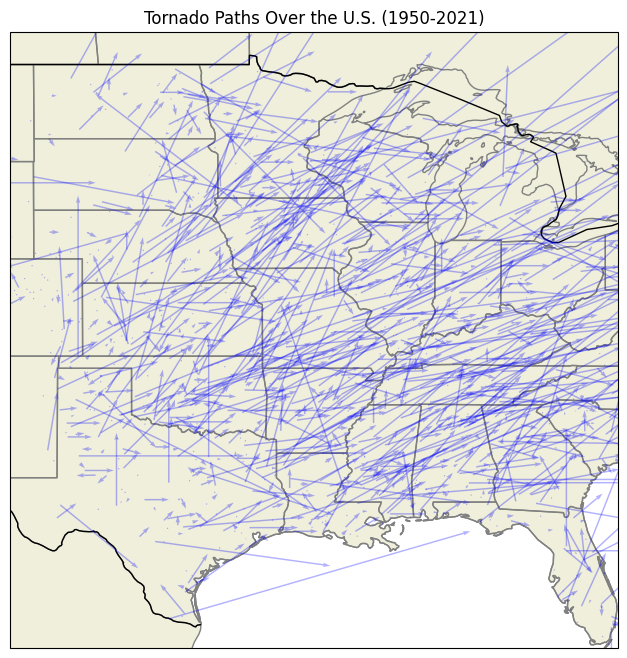

In [ ]:
#Sampling every 20th tornado to reduce clutter
sample_df = model_df.iloc[::30]

dx = sample_df['end_long'] - sample_df['start_long']
dy = sample_df['end_lat'] - sample_df['start_lat']

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-105, -80, 25, 50])  # Central U.S. (Tornado Alley)

#Add map features
ax.add_feature(cfeature.LAND, edgecolor='gray', zorder=0)
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='solid', zorder=1)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1, zorder=1)

#Plit tornado paths as vectors
ax.quiver(sample_df['start_long'], sample_df['start_lat'], dx, dy,
          transform=ccrs.PlateCarree(), angles='xy', scale_units='xy', scale=0.05,
          color='blue', alpha=0.3)

ax.set_title("Tornado Paths Over the U.S. (1950-2021)")
plt.show()

###**Single Color Vector Field (Excluding EF0 & EF5)**

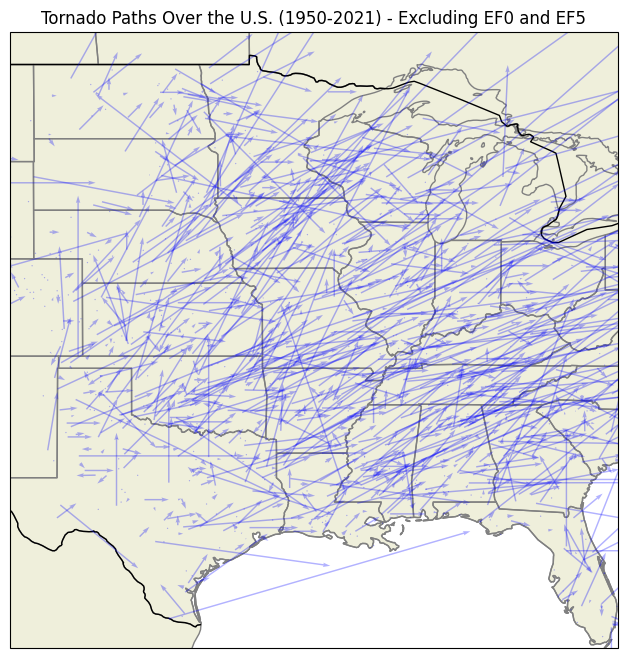

In [ ]:
# Filter out EF0 and EF5 ratings
filtered_df = model_df[~model_df['EF-Scale'].isin(['0', '5'])]

# Sampling every 30th tornado to reduce clutter (after filtering)
sample_df = filtered_df.iloc[::30]

# Calculate differences for vector plotting
dx = sample_df['end_long'] - sample_df['start_long']
dy = sample_df['end_lat'] - sample_df['start_lat']

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-105, -80, 25, 50])  # Central U.S. (Tornado Alley)

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='grey', zorder=0)
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='solid', zorder=1)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1, zorder=1)

# Plot tornado paths as vectors
ax.quiver(sample_df['start_long'], sample_df['start_lat'], dx, dy,
          transform=ccrs.PlateCarree(), angles='xy', scale_units='xy', scale=0.05,
          color='blue', alpha=0.3)

ax.set_title("Tornado Paths Over the U.S. (1950-2021) - Excluding EF0 and EF5")
plt.show()

###**Color Coded Vector Field (All Ratings)**

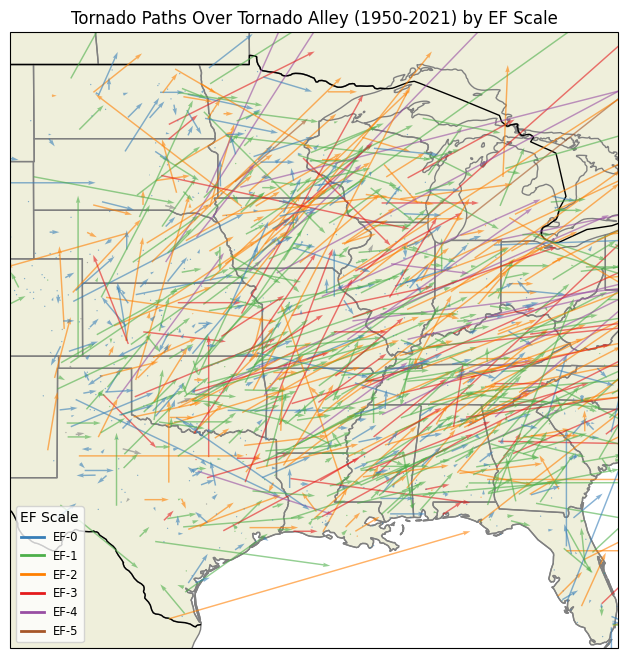

In [ ]:
# Sample every 20th tornado to reduce clutter
sample_df = model_df.iloc[::30]

# Compute tornado vector components
dx = sample_df['end_long'] - sample_df['start_long']
dy = sample_df['end_lat'] - sample_df['start_lat']

# Define EF-Scale colormap (adjust as needed)
ef_colors = {
    0: '#377eb8',  # Blue
    1: '#4daf4a',  # Green
    2: '#ff7f00',  # Yellow
    3: '#e41a1c',  # Orange
    4: '#984ea3',  # Purple
    5: '#a65628'   # Dark Red
}

colors = sample_df['EF-Scale'].map(ef_colors).fillna('#808080')  # Default gray for unknown EF

# Create figure with map projection
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Zoom into Tornado Alley (Central U.S.)
ax.set_extent([-105, -80, 25, 50])  # Longitude and latitude bounds

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='gray', zorder=0)
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='solid', zorder=1)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1, zorder=1)

# Plot tornado paths with color-coded EF scale
q = ax.quiver(sample_df['start_long'], sample_df['start_lat'], dx, dy,
              transform=ccrs.PlateCarree(), angles='xy', scale_units='xy', scale=0.05,
              color=colors, alpha=0.6)

# Create legend for EF Scale
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color=ef_colors[i], lw=2, label=f'EF-{i}') for i in range(6)]
ax.legend(handles=legend_elements, loc='lower left', title="EF Scale", fontsize='small')

# Set title
ax.set_title("Tornado Paths Over Tornado Alley (1950-2021) by EF Scale")

# Show plot
plt.show()


###**Color Coded by Decade (All Ratings)**

<ipython-input-10-5351a2c37af5>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('viridis', len(unique_decades))  # Use viridis colormap


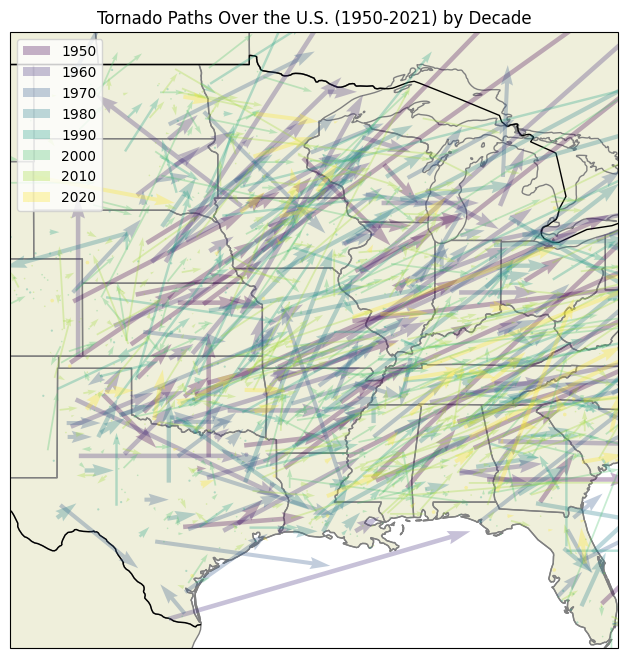

In [ ]:
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import numpy as np
# import pandas as pd

# Add decade column
model_df['decade'] = (model_df['year'] // 10) * 10

# Sampling every 30th tornado to reduce clutter
sample_df = model_df.iloc[::30].copy()

# Calculate dx and dy for the vector field
dx = sample_df['end_long'] - sample_df['start_long']
dy = sample_df['end_lat'] - sample_df['start_lat']

#Define colors for each decade
unique_decades = sorted(sample_df['decade'].unique())
color_map = plt.cm.get_cmap('viridis', len(unique_decades))  # Use viridis colormap
decade_colors = {decade: color_map(i / (len(unique_decades) - 1)) for i, decade in enumerate(unique_decades)}

# Set up the plot with cartopy
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-105, -80, 25, 50])  # Central U.S. (Tornado Alley)

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='gray', zorder=0)
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='solid', zorder=1)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1, zorder=1)

# Plot tornado paths by decade with different colors
for decade in decade_colors:
    decade_mask = sample_df['decade'] == decade
    # Plot regular paths
    ax.quiver(sample_df[decade_mask]['start_long'], sample_df[decade_mask]['start_lat'],
              dx[decade_mask], dy[decade_mask],
              transform=ccrs.PlateCarree(), angles='xy', scale_units='xy', scale=0.05,
              color=decade_colors[decade], alpha=0.3, label=f'{decade}')

ax.set_title("Tornado Paths Over the U.S. (1950-2021) by Decade")
ax.legend()
plt.show()

### **Vector Field Differentiating Longer Tornadoes**

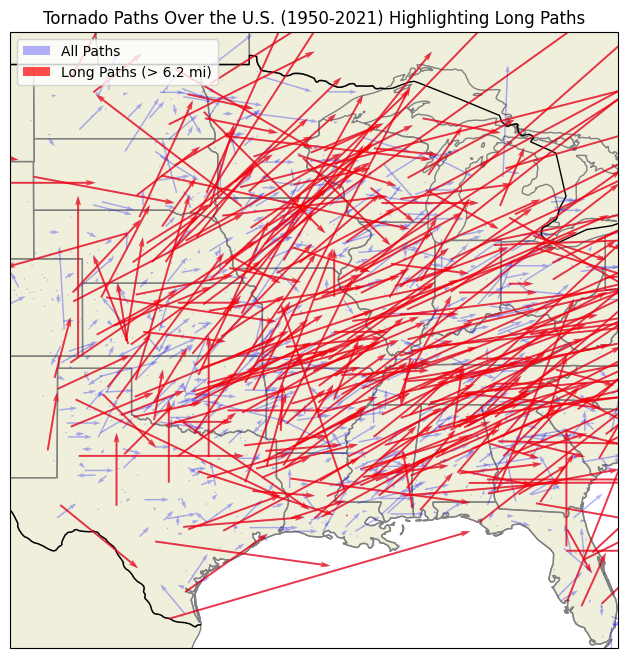

In [ ]:
# Sampling every 30th tornado to reduce clutter
sample_df = model_df.iloc[::30].copy()

# Calculate dx and dy for the vector field
dx = sample_df['end_long'] - sample_df['start_long']
dy = sample_df['end_lat'] - sample_df['start_lat']

# Define threshold for long paths (75th percentile of length(mi))
length_threshold = sample_df['length(mi)'].quantile(0.75)

# Set up the plot with cartopy
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-105, -80, 25, 50])

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='gray', zorder=0)
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='solid', zorder=1)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1, zorder=1)

# Plot all tornado paths
ax.quiver(sample_df['start_long'], sample_df['start_lat'], dx, dy,
          transform=ccrs.PlateCarree(), angles='xy', scale_units='xy', scale=0.05,
          color='blue', alpha=0.3, label='All Paths')

# Highlight long paths
long_paths = sample_df['length(mi)'] > length_threshold
if long_paths.any():
    ax.quiver(sample_df[long_paths]['start_long'], sample_df[long_paths]['start_lat'],
              dx[long_paths], dy[long_paths],
              transform=ccrs.PlateCarree(), angles='xy', scale_units='xy', scale=0.05,
              color='red', alpha=0.7, linewidth=2, label=f'Long Paths (> {length_threshold:.1f} mi)')

ax.set_title("Tornado Paths Over the U.S. (1950-2021) Highlighting Long Paths")
ax.legend()
plt.show()

###**Color Coded Vector Field (Excluing EF0 & EF5)**

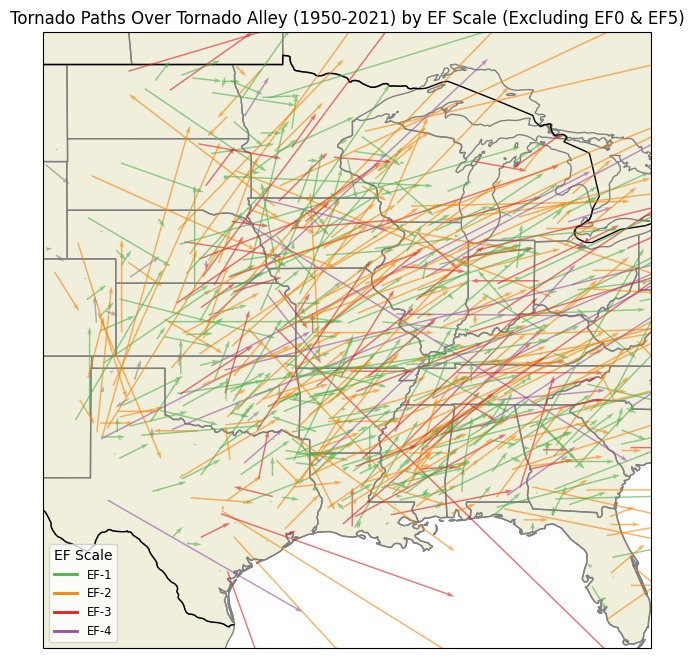

In [ ]:
# Filter out EF0 and EF5 ratings
filtered_df = model_df[~model_df['EF-Scale'].isin([0, 5])]  # Assuming EF-Scale is numeric (0 for EF0, 5 for EF5)

# Sample every 30th tornado to reduce clutter (after filtering)
sample_df = filtered_df.iloc[::30]

# Compute tornado vector components
dx = sample_df['end_long'] - sample_df['start_long']
dy = sample_df['end_lat'] - sample_df['start_lat']

# Define EF-Scale colormap - Excluding EF0 and EF5
ef_colors = {
    1: '#4daf4a',  # Green for EF1
    2: '#ff7f00',  # Yellow for EF2
    3: '#e41a1c',  # Orange for EF3
    4: '#984ea3',  # Purple for EF4
}

# Map colors directly for the filtered data
colors = sample_df['EF-Scale'].map(lambda ef_scale: ef_colors.get(ef_scale, '#808080'))

# Create figure with map projection
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Zoom into Tornado Alley (Central U.S.)
ax.set_extent([-105, -80, 25, 50])  # Longitude and latitude bounds

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='gray', zorder=0)
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='solid', zorder=1)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1, zorder=1)

# Plot tornado paths with color-coded EF scale for the filtered data
q = ax.quiver(sample_df['start_long'], sample_df['start_lat'], dx, dy,
              transform=ccrs.PlateCarree(), angles='xy', scale_units='xy', scale=0.05,
              color=colors, alpha=0.6)

# Create legend for EF Scale - Excluding EF0 and EF5
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color=color, lw=2, label=f'EF-{ef_scale}')
                   for ef_scale, color in ef_colors.items()]

ax.legend(handles=legend_elements, loc='lower left', title="EF Scale", fontsize='small')

# Set title
ax.set_title("Tornado Paths Over Tornado Alley (1950-2021) by EF Scale (Excluding EF0 & EF5)")

# Show plot
plt.show()